In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


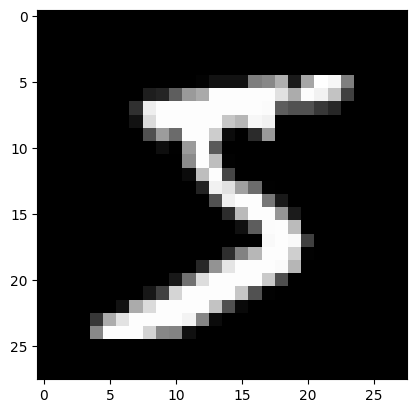

In [3]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
#model = keras.models.Sequential()

#model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(10, activation='softmax'))
#model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])



In [6]:
#model.fit(x_train, y_train, batch_size = 64, epochs = 1, validation_data=(x_test, y_test), verbose=1)

In [7]:
!pip install keras_tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.5 MB/s eta 0:00:00


In [12]:
def build_model(hp):
  model = keras.models.Sequential()
  model.add(Conv2D(hp.Int('Num_of_Kernel_1', min_value=10, max_value=200, step=10), (3, 3),
                   input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  if hp.Boolean('dropout'):
    model.add(Dropout(0.2))


  for i in range(hp.Int('number_of_conv2d', 2, 5)):
      model.add(Conv2D(hp.Int(f'Num_of_Kernel_{i}', min_value=10, max_value=200, step=10), (3, 3), activation='relu'))


  #model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(64, (hp.Choice('x_kernel_size', [2, 3]), hp.Choice('y_kernel_size', [2, 3])), activation=hp.Choice('activation_2', values=['relu', 'tanh'])))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(hp.Float('Dropout_rate', min_value=0.1, max_value=0.9, step=0.1)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer= hp.Choice('optimizer', values=['adam', 'sgd']), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
  return model


In [13]:
#model = build_model()
#model.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_test, y_test), verbose=1)

In [14]:
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=1)
tuner.search(x=x_train, y=y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))

Trial 1 Complete [00h 03m 24s]
val_accuracy: 0.9704999923706055

Best val_accuracy So Far: 0.9704999923706055
Total elapsed time: 00h 03m 24s


In [15]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
Num_of_Kernel_1: 120
dropout: False
number_of_conv2d: 4
Num_of_Kernel_0: 20
x_kernel_size: 2
y_kernel_size: 2
activation_2: tanh
Dropout_rate: 0.7000000000000001
optimizer: adam
Num_of_Kernel_2: 10
Num_of_Kernel_3: 10
Score: 0.9704999923706055


In [16]:
def build_model():
  model = keras.models.Sequential()
  model.add(Conv2D(120, (3, 3),
                   input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(20, (3, 3), activation='relu'))
  model.add(Conv2D(10, (3, 3), activation='relu'))
  model.add(Conv2D(10, (3, 3), activation='relu'))


  #model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(64, (2, 2), activation= 'tanh'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.7))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer= 'adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
  return model